In [1]:
import os
import sys
import re
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from pathlib import Path

Get list of files for data

In [2]:
data_location = r'./'

data_files = []
data_files += [os.path.join(data_location, each) for each in os.listdir(data_location) if each.endswith('.dynamicMesh')]
print(data_files)

['./log.dynamicMesh']


Retrieve the data with an array of arrays for each parameter that's important.

In this case, it's High aspect ratio cells
    Minimum face area = 2.678588334e-06

    Maximum face area = 0.2049829902

    Min volume = 2.678588334e-06

    Max volume = 0.04078116445

    Total volume = 239.9300838

    Mesh non-orthogonality Max: 42.41365807

    Mesh non-orthogonality average: 4.437578995
    
    Max skewness = 0.6555741234

In [3]:
def process_single_file(file_list):

    aspect_ratio = []
    min_faceArea = []
    max_faceArea = []
    min_volume = []
    max_volume = []
    total_volume = []
    nonOrg_max = []
    nonOrg_avg = []
    skewness = []

    with open(file_list[0], 'r') as f:
        for line in f:
            if('High aspect ratio' in line):
                matches = re.findall("[+-]?\d+\.\d+", line)
                aspect_ratio.append(float(matches[0]))
            elif('Minimum face area' in line):
                matches = re.findall("[+-]?\d+\.\d+", line)
                min_faceArea.append(float(matches[0]))
                max_faceArea.append(float(matches[1]))
            elif('Min volume' in line):
                matches = re.findall("[+-]?\d+\.\d+", line)
                min_volume.append(float(matches[0]))
                max_volume.append(float(matches[1]))
                total_volume.append(float(matches[2]))
            elif('Mesh non-orthogonality' in line):
                matches = re.findall("[+-]?\d+\.\d+", line)
                nonOrg_max.append(float(matches[0]))
                nonOrg_avg.append(float(matches[1]))
            elif('Max skewness' in line):
                matches = re.findall("[+-]?\d+\.\d+", line)
                skewness.append(float(matches[0]))
        
        return np.asarray(aspect_ratio), np.asarray(min_faceArea), np.asarray(max_faceArea), np.asarray(min_volume), np.asarray(max_volume), np.asarray(total_volume), np.asarray(nonOrg_max), np.asarray(nonOrg_avg), np.asarray(skewness)

In [4]:
aspect_ratio, min_faceArea, max_faceArea, min_volume, max_volume, total_volume, nonOrg_max, nonOrg_avg, skewness = process_single_file(data_files)

data = {'Aspect Ratio':aspect_ratio, 'Min Face Area':min_faceArea, 'Max Face Area':max_faceArea, 'Min Volume':min_volume, 'Max Volume':max_volume, 'Total Volume':total_volume, 'Max NO':nonOrg_max, 'Avg NO':nonOrg_avg, 'Skewness':skewness}

mesh_df = pd.DataFrame(data)

In [5]:
mesh_df.head()

,Aspect Ratio,Min Face Area,Max Face Area,Min Volume,Max Volume,Total Volume,Max NO,Avg NO,Skewness
0,1208.194166,2.678588,0.204983,2.678588,0.040781,239.930084,42.413658,4.437579,0.655574
1,1093.672881,2.959070,0.204963,2.959070,0.040776,239.927442,42.773312,4.446902,0.747929
2,1140.807333,2.836811,0.204974,2.836811,0.040779,239.928287,42.580687,4.436853,0.704516


Text(0.5, 0, 'Time [s]')

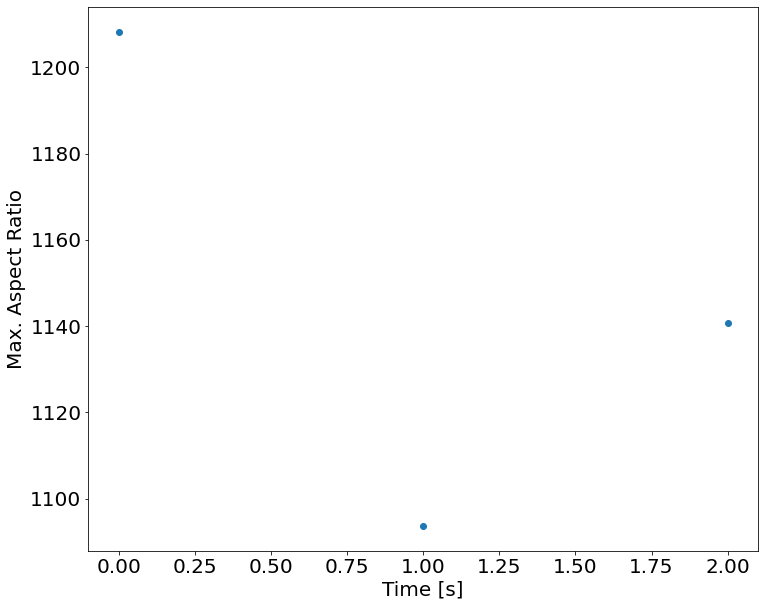

In [10]:
plt.rcParams.update({'font.size':20})
fig1, ax1 = plt.subplots(figsize=(12,10))
ax1.plot(mesh_df['Aspect Ratio'], 'o')
ax1.set_ylabel('Max. Aspect Ratio')
ax1.set_xlabel('Time [s]')

Text(0.5, 0, 'Time [s]')

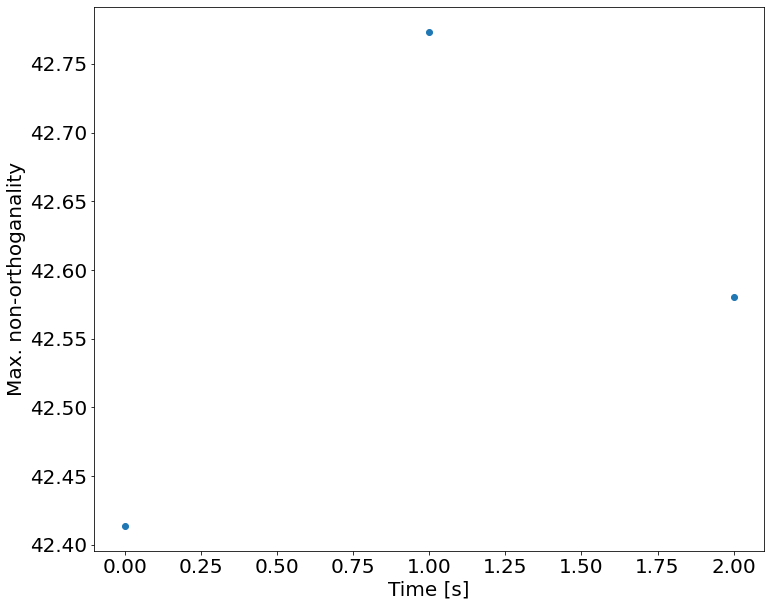

In [11]:
fig2, ax2 = plt.subplots(figsize=(12,10))
ax2.plot(mesh_df['Max NO'], 'o')
ax2.set_ylabel('Max. non-orthoganality')
ax2.set_xlabel('Time [s]')

Text(0.5, 0, 'Time [s]')

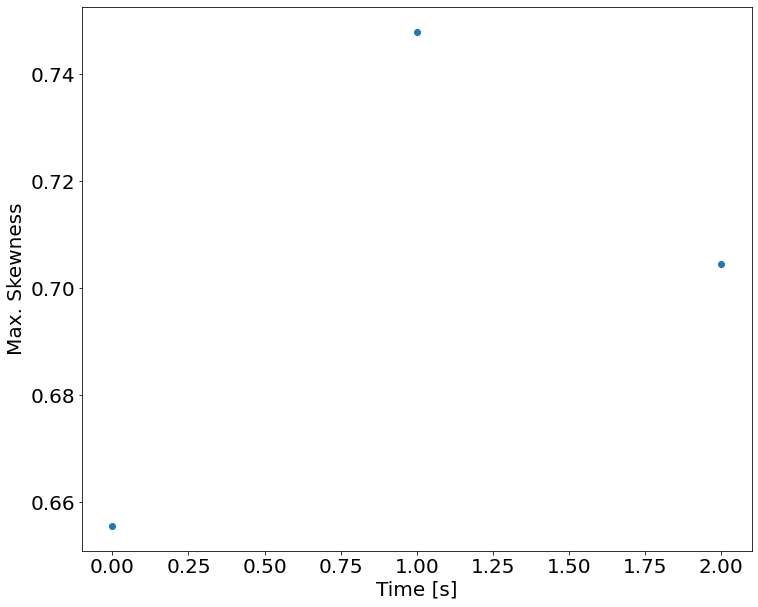

In [12]:
fig3, ax3 = plt.subplots(figsize=(12,10))
ax3.plot(mesh_df['Skewness'], 'o')
ax3.set_ylabel('Max. Skewness')
ax3.set_xlabel('Time [s]')